# Práctica 3 Parte 2 Alumnos

Hecho por Alberto Roig y Álvaro Chávarri

Primero, importamos las librerias que vayamos a usar

In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as pl
import mlxtend as mx
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Leemos el csv indicado en el enunciado para la realización del ejercicio

In [2]:
data=pd.read_csv("estudiantes.csv")#Leemos el fichero csv
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Cogemos todas las filas, de cada columna de cada apartado para la realización de cada clasificador, una por asignatura

In [3]:
data["gender"]=data['gender'].astype('category')
data["race/ethnicity"]=data['race/ethnicity'].astype('category')
data["parental level of education"]=data['parental level of education'].astype('category')
data["lunch"]=data['lunch'].astype('category')
data["test preparation course"]=data['test preparation course'].astype('category')

In [4]:
data["gender"]=data['gender'].cat.codes
data["race/ethnicity"]=data['race/ethnicity'].cat.codes
data["parental level of education"]=data['parental level of education'].cat.codes
data["lunch"]=data['lunch'].cat.codes
data["test preparation course"]=data['test preparation course'].cat.codes

In [5]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

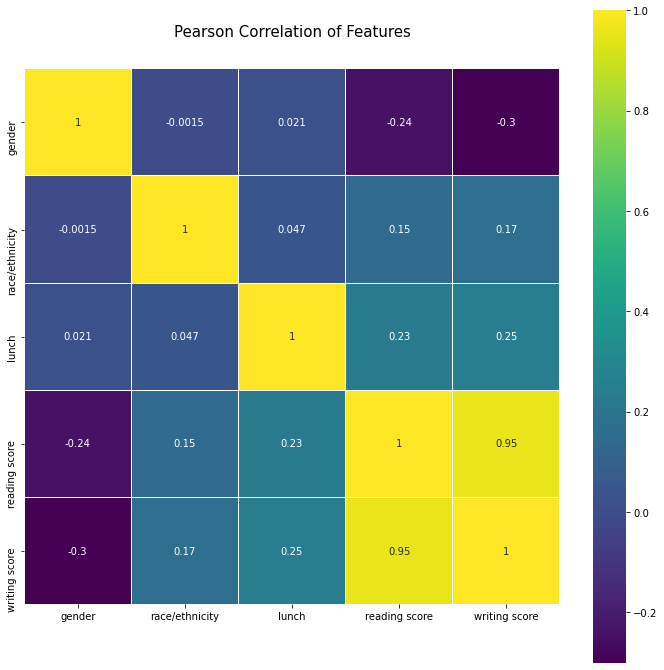

In [6]:
X=data.drop(['math score'], axis=1)
y=data['math score']

best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)


used_features =X.columns[selected]
 
colormap = pl.cm.viridis
pl.figure(figsize=(12,12))
pl.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [8]:
#Quitamos 10 dato para utilizarlos en el ultimo apartado
test=data.tail(10)
data.drop(data.tail(10).index,inplace=True)

In [10]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=6) 
y_train =X_train["math score"]
y_test = X_test["math score"]

In [11]:
# Instantiate the classifier

gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.08
Precisión en el set de Test: 0.03


In [12]:
result=print(gnb.predict([[1,1,1,70,90],[0,0,0,76,75]]))
result=np.asarray(result)

[82 65]


# Otra forma

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        data.drop(columns = "math score"),
                                        data['math score'],
                                        random_state = 123
                                    )
X_train3, X_test3, y_train3, y_test3 = train_test_split(
                                        data.drop(columns = "reading score"),
                                        data['reading score'],
                                        random_state = 123
                                    )
X_train4, X_test4, y_train4, y_test4 = train_test_split(
                                        data.drop(columns = "writing score"),
                                        data['writing score'],
                                        random_state = 123
                                    )

In [14]:
modelo = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 123
          )
modelo2 = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 123
          )
modelo3 = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 123
          )

In [15]:
modelo.fit(X_train2, y_train2)
modelo2.fit(X_train3, y_train3)
modelo3.fit(X_train3, y_train3)

DecisionTreeRegressor(max_depth=4, random_state=123)

Profundidad del árbol: 4
Número de nodos terminales: 16


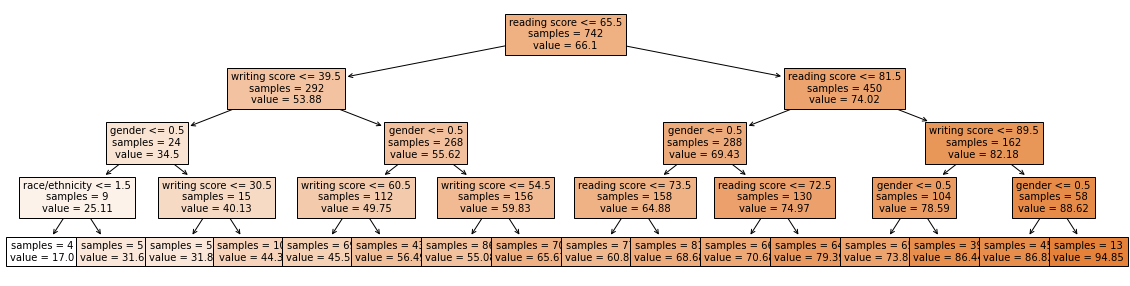

In [16]:
fig, ax = pl.subplots(figsize=(20, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = data.drop(columns = "math score").columns,
            class_names   = 'math score',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

Profundidad del árbol: 4
Número de nodos terminales: 16


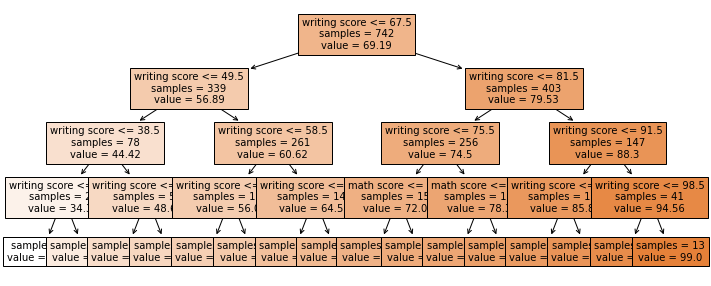

In [17]:
fig2, ax2 = pl.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo2.get_depth()}")
print(f"Número de nodos terminales: {modelo2.get_n_leaves()}")

plot2 = plot_tree(
            decision_tree = modelo2,
            feature_names = data.drop(columns = "reading score").columns,
            class_names   = 'reading score',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax2
       )

Profundidad del árbol: 4
Número de nodos terminales: 16


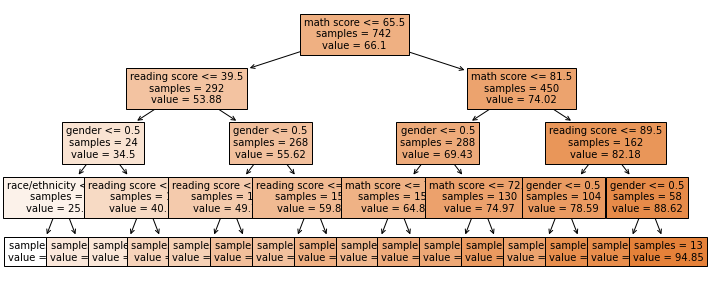

In [18]:
fig3, ax3 = pl.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo3.get_depth()}")
print(f"Número de nodos terminales: {modelo3.get_n_leaves()}")

plot3 = plot_tree(
            decision_tree = modelo,
            feature_names = data.drop(columns = "writing score").columns,
            class_names   = 'writing score',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax3
       )